In [80]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Lets read data and understand it. It got 15 columns (14-descriptive feature+1-target feature).
Columns are:
'age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income'

In [81]:
adult_train_df = pd.read_csv('adult.data',sep=',')

In [82]:
adult_train_df.columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

In [83]:
df_obj=adult_train_df[['workclass','education','marital_status','occupation','relationship','race','sex','native_country','income']]

By observing, the data we find many values are leading and trailing space on values. Lets strip them out

In [84]:
adult_train_df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip()) # Strip all string features

Target column 'income' got 2 distinct values <=50K and >50K. lets convert the target column to numberical values like 1 or 0

In [85]:
adult_train_df['income'] = adult_train_df['income'].apply(lambda inc: 0 if inc == "<=50K" else 1)

In [86]:
adult_train_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1


Lets clean other aspects of the columns. On observing data, we find some values on certain columns as below.

In [87]:
adult_train_df.workclass.unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [88]:
adult_train_df.occupation.unique()

array(['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [89]:
adult_train_df.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [90]:
adult_train_df.shape

(32560, 15)

Remove all rows which got values like '?'

In [91]:
adult_train_df.drop(adult_train_df[adult_train_df['workclass']=='?'].index,inplace=True)
adult_train_df.drop(adult_train_df[adult_train_df['occupation']=='?'].index,inplace=True)
adult_train_df.drop(adult_train_df[adult_train_df['native_country']=='?'].index,inplace=True)

In [92]:
adult_train_df.shape

(30161, 15)

In [93]:
adult_train_df.isnull().sum(axis=0) # missing values in dataset?

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Lets find out the correlation matrix. This will help out to remove features which are not going to improve our classification

Text(0.5, 1.0, 'Heatmap showing correlations between numerical data')

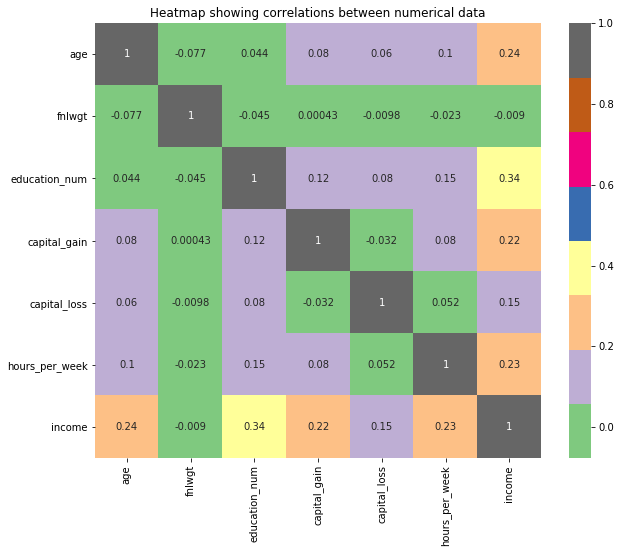

In [94]:
plt.figure(figsize=(10,8))  
sns.heatmap(adult_train_df.corr(),cmap='Accent',annot=True)
plt.title('Heatmap showing correlations between numerical data')


In [95]:
adult_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 15 columns):
age               30161 non-null int64
workclass         30161 non-null object
fnlwgt            30161 non-null int64
education         30161 non-null object
education_num     30161 non-null int64
marital_status    30161 non-null object
occupation        30161 non-null object
relationship      30161 non-null object
race              30161 non-null object
sex               30161 non-null object
capital_gain      30161 non-null int64
capital_loss      30161 non-null int64
hours_per_week    30161 non-null int64
native_country    30161 non-null object
income            30161 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


Lets, repeat same exercise for test data

In [96]:
adult_test_df = pd.read_csv('adult.test',sep=',',skiprows=[0])

In [97]:
adult_test_df.columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

In [98]:
adult_test_df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip()) # Strip all string features

In [99]:
adult_test_df['income'] = adult_test_df['income'].apply(lambda inc: 0 if inc == "<=50K" else 1)

In [100]:
adult_test_df.drop(adult_test_df[adult_test_df['workclass']=='?'].index,inplace=True)
adult_test_df.drop(adult_test_df[adult_test_df['occupation']=='?'].index,inplace=True)
adult_test_df.drop(adult_test_df[adult_test_df['native_country']=='?'].index,inplace=True)

In [101]:
adult_test_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,38,Self-emp-not-inc,89814,Bachelors,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,0
1,28,Private,336951,HS-grad,12,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,44,Private,160323,11th,10,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,7688,0,40,United-States,0
3,18,Private,103497,Bachelors,10,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,30,Cuba,0
4,34,Private,198693,Masters,6,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,30,United-States,0
5,29,Private,227026,9th,9,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,40,Jamaica,0
6,63,Self-emp-not-inc,104626,HS-grad,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,3103,0,32,United-States,1
7,24,Private,369667,Masters,10,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,1
8,55,Private,104996,Bachelors,4,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,10,United-States,1
9,65,Private,184454,Some-college,9,Married-civ-spouse,Exec-managerial,Husband,Black,Male,6418,0,40,United-States,1


In [102]:
adult_test_df.shape

(15075, 15)

In [103]:
adult_test_df.isnull().sum(axis=0) # How many issing values are there in the dataset?

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Lets use sklearn, to train and do prediction out of numerical features available except fnlwgt and education_num. fnlwgt is uncorreleated with income from heatmap with correlation coefficient -0.00095. One can notice the high correlation between education and education.num in the heatmap. so, we remove education_num

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [105]:
#with numerical data only
rfmodel = RandomForestClassifier(n_estimators=300,oob_score=True,min_samples_split=5,max_depth=10,random_state=10)
X_train = adult_train_df[['age','capital_gain','capital_loss','hours_per_week']]
y_train = adult_train_df['income']
X_test = adult_test_df[['age','capital_gain','capital_loss','hours_per_week']]
y_test = adult_test_df['income']
rfmodel.fit(X_train,y_train)
print(rfmodel)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=True, random_state=10, verbose=0, warm_start=False)


In [106]:
def show_classifier_metrics(clf, y_train=y_train,y_test=y_test, print_classification_report=True, print_confusion_matrix=True):
    print(clf)
    if print_confusion_matrix:
        print('confusion matrix of training data')
        print(metrics.confusion_matrix(y_train, clf.predict(X_train)))
        print('confusion matrix of test data')
        print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
    if print_classification_report:
        print('classification report of test data')
        print(metrics.classification_report(y_test, clf.predict(X_test)))
    print('Accuracy on test data: %f%%' % (metrics.accuracy_score(y_test, clf.predict(X_test))*100))
    print('Accuracy on training data: %f%%' % (metrics.accuracy_score(y_train, clf.predict(X_train))*100))
    print('Area under the ROC curve : %f' % (metrics.roc_auc_score(y_test, clf.predict(X_test))))

In [107]:
show_classifier_metrics(rfmodel,y_train)
print('out-of-bag (oob) error = %f'% rfmodel.oob_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=True, random_state=10, verbose=0, warm_start=False)
confusion matrix of training data
[[22625    28]
 [ 5326  2182]]
confusion matrix of test data
[[10586   765]
 [ 3489   235]]
classification report of test data
              precision    recall  f1-score   support

           0       0.75      0.93      0.83     11351
           1       0.23      0.06      0.10      3724

   micro avg       0.72      0.72      0.72     15075
   macro avg       0.49      0.50      0.47     15075
weighted avg       0.62      0.72      0.65     15075

Accuracy on test data: 71.781095%
Accuracy on training data: 82.248599%
Area under the ROC curve : 0.497

Now, lets use 2 techniques, to change categorical descriptive columns like ['workclass','sex', 'marital_status',
'race','relationship','occupation'] to numerical values using one-hot encoding method. This will produce multiple columns per each level of values given a categorical feature.

In [108]:
#One-hot encoding method
X_train_hot_encoding_df = pd.get_dummies(adult_train_df,columns=['workclass','sex', 'marital_status',
                                    'race','relationship','occupation'],
               prefix=['workclass', 'is', 'is', 'race_is', 'relation', 'is'], drop_first=True)

In [109]:
#One-hot encoding method
X_test_hot_encoding_df = pd.get_dummies(adult_test_df,columns=['workclass','sex', 'marital_status',
                                    'race','relationship','occupation'],
               prefix=['workclass', 'is', 'is', 'race_is', 'relation', 'is'], drop_first=True)

Capture target variable for test and train data set into another local variable before removing

In [110]:
y_train = adult_train_df['income']
y_test = adult_test_df['income']

Lets remove columns like 'native_country','education','fnlwgt' which does not help in our classification. Now, we run RandomForest with both numerical values and categorical values with one-hot encoding. We can see the accuracy is improved on test data and train data

In [111]:
X_test_hot_encoding_df.drop(labels=['native_country','education','income'],axis=1,inplace=True)
X_train_hot_encoding_df.drop(labels=['native_country','education','income'],axis=1,inplace=True)

In [112]:
rfmodel = RandomForestClassifier(n_estimators=300,oob_score=True,min_samples_split=5,max_depth=10,random_state=10)
rfmodel.fit(X_train_hot_encoding_df,y_train)
print(rfmodel)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=True, random_state=10, verbose=0, warm_start=False)


In [76]:
def show_classifier_metrics(clf, y_train=y_train,y_test=y_test, print_classification_report=True, print_confusion_matrix=True):
    print(clf)
    if print_confusion_matrix:
        print('confusion matrix of training data')
        print(metrics.confusion_matrix(y_train, clf.predict(X_train_hot_encoding_df)))
        print('confusion matrix of test data')
        print(metrics.confusion_matrix(y_test, clf.predict(X_test_hot_encoding_df)))
    if print_classification_report:
        print('classification report of test data')
        print(metrics.classification_report(y_test, clf.predict(X_test_hot_encoding_df)))
    print('Accuracy on test data: %f%%' % (metrics.accuracy_score(y_test, clf.predict(X_test_hot_encoding_df))*100))
    print('Accuracy on training data: %f%%' % (metrics.accuracy_score(y_train, clf.predict(X_train_hot_encoding_df))*100))
    print('Area under the ROC curve : %f' % (metrics.roc_auc_score(y_test, clf.predict(X_test_hot_encoding_df))))

In [77]:
show_classifier_metrics(rfmodel,y_train)
print('out-of-bag (oob) error = %f'% rfmodel.oob_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=True, random_state=10, verbose=0, warm_start=False)
confusion matrix of training data
[[21679   974]
 [ 3170  4338]]
confusion matrix of test data
[[10294  1057]
 [ 2915   809]]
classification report of test data
              precision    recall  f1-score   support

           0       0.78      0.91      0.84     11351
           1       0.43      0.22      0.29      3724

   micro avg       0.74      0.74      0.74     15075
   macro avg       0.61      0.56      0.56     15075
weighted avg       0.69      0.74      0.70     15075

Accuracy on test data: 73.651741%
Accuracy on training data: 86.260403%
Area under the ROC curve : 0.562

In [113]:
adult_train_df.drop(labels=['native_country','education','income'],axis=1,inplace=True)
adult_test_df.drop(labels=['native_country','education','income'],axis=1,inplace=True)

Now, lets use 2nd technique. This will not have multiple columns as like one hot encoding. Rather, it assign index value for each level values of a given categorical feature.

In [114]:
def mapping(column_str,data):
    data_ = data[column_str]
    list_ = list(set(data_))
    map_ = {}
    for i in range(len(list_)):
        map_[list_[i]] = i
    return data_.map(map_)

# Mapping non-numeric data to numeric data
non_numeric = ["workclass", "marital_status", "occupation", "relationship", "race", "sex"]
for column in non_numeric:
    adult_train_df[column] = mapping(column,adult_train_df)
    adult_test_df[column] = mapping(column,adult_test_df)

In [115]:
X_train_df = adult_train_df
X_test_df = adult_test_df

Now, run SVM classifier with kernels like rbf, sigmoid

In [116]:
from sklearn.svm import SVC

In [120]:
def skitlearn_svm(kernel="rbf"):
    svm_ = SVC(kernel=kernel)
    svm_.fit(adult_train_df, y_train)
    pred_Y = svm_.predict(X_test_df)
    print('SVM:')
    print('accuracy %s' % metrics.accuracy_score(y_test, pred_Y))
    print('Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores. %s' % metrics.roc_auc_score(y_test, pred_Y))

In [121]:
#kernels = ["linear", "rbf", "poly", "sigmoid"]

skitlearn_svm()

/Users/santhoshkaruppiah/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM:
accuracy 0.752636815920398
Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores. 0.49986997033719754


In [122]:
skitlearn_svm(kernel="sigmoid")

/Users/santhoshkaruppiah/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM:
accuracy 0.7529684908789387
Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores. 0.5
